## **DECISION TREE**


Exercise: Build decision tree model to predict survival based on certain parameters <br>

![titanic](titanic.jpg)

CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv <br>

In this file using following columns build a model to predict if person would survive or not, <br>
Pclass <br>
Sex <br>
Age <br>
Fare <br>
Calculate score of your model <br>

In [124]:
# Import Libraries
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [125]:
#Load the dataset
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [126]:
# Check the datatypes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
# Check for missing values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*In our dataset, two columns (Age & Cabin) have missing values. Age is among the columns i will use to model therefore, i will drop other columns then fill the Age column.*

In [128]:
#drop the columns that wil not be used
columns_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
titanic = titanic.drop(columns_to_drop, axis=1)
titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


*The is only one categorical column therefore i will one hot encode it creating new columns*

In [129]:
# Calculate the median of the age column
median = titanic.Age.median()
median

28.0

In [130]:
# Fill the age column with the median
titanic.Age = titanic.Age.fillna(median)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

#### **Categorical columns**

In [131]:
# Encoding the sex column
ohe = OneHotEncoder(sparse=False)
encoded_column = ohe.fit_transform(titanic[['Sex']])
titanic = pd.concat([titanic, pd.DataFrame(encoded_column, columns=ohe.get_feature_names_out(['Sex']))], axis=1) 
titanic

,Survived,Pclass,Sex,Age,Fare,Sex_female,Sex_male
0,0,3,male,22.0,7.2500,0.0,1.0
1,1,1,female,38.0,71.2833,1.0,0.0
2,1,3,female,26.0,7.9250,1.0,0.0
3,1,1,female,35.0,53.1000,1.0,0.0
4,0,3,male,35.0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0.0,1.0
887,1,1,female,19.0,30.0000,1.0,0.0
888,0,3,female,28.0,23.4500,1.0,0.0
889,1,1,male,26.0,30.0000,0.0,1.0


In [132]:
# Drop the Sex column
titanic = titanic.drop('Sex', axis=1)
titanic

,Survived,Pclass,Age,Fare,Sex_female,Sex_male
0,0,3,22.0,7.2500,0.0,1.0
1,1,1,38.0,71.2833,1.0,0.0
2,1,3,26.0,7.9250,1.0,0.0
3,1,1,35.0,53.1000,1.0,0.0
4,0,3,35.0,8.0500,0.0,1.0
...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0.0,1.0
887,1,1,19.0,30.0000,1.0,0.0
888,0,3,28.0,23.4500,1.0,0.0
889,1,1,26.0,30.0000,0.0,1.0


#### **Training and Testing Sets**

In [133]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [134]:
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train

,Pclass,Age,Fare,Sex_female,Sex_male
429,3,32.0,8.0500,0.0,1.0
629,3,28.0,7.7333,0.0,1.0
351,1,28.0,35.0000,0.0,1.0
45,3,28.0,8.0500,0.0,1.0
577,1,39.0,55.9000,1.0,0.0
...,...,...,...,...,...
369,1,24.0,69.3000,1.0,0.0
320,3,22.0,7.2500,0.0,1.0
527,1,28.0,221.7792,0.0,1.0
125,3,12.0,11.2417,0.0,1.0


#### **Modeling**

In [135]:
#Initialize
decison_tree = DecisionTreeClassifier()
#Fit the model to X and y trains
decison_tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### **Prediciting**

In [136]:
X_test.head(30)

,Pclass,Age,Fare,Sex_female,Sex_male
590,3,35.0,7.1250,0.0,1.0
131,3,20.0,7.0500,0.0,1.0
628,3,26.0,7.8958,0.0,1.0
195,1,58.0,146.5208,1.0,0.0
230,1,35.0,83.4750,1.0,0.0
646,3,19.0,7.8958,0.0,1.0
75,3,25.0,7.6500,0.0,1.0
586,2,47.0,15.0000,0.0,1.0
569,3,32.0,7.8542,0.0,1.0
287,3,22.0,7.8958,0.0,1.0


In [137]:
y_pred = decison_tree.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [138]:
titanic_data = titanic[titanic['Pclass']==3]
titanic_data.tail(20)

,Survived,Pclass,Age,Fare,Sex_female,Sex_male
852,0,3,9.0,15.2458,1.0,0.0
855,1,3,18.0,9.3500,1.0,0.0
858,1,3,24.0,19.2583,1.0,0.0
859,0,3,28.0,7.2292,0.0,1.0
860,0,3,41.0,14.1083,0.0,1.0
863,0,3,28.0,69.5500,1.0,0.0
868,0,3,28.0,9.5000,0.0,1.0
869,1,3,4.0,11.1333,0.0,1.0
870,0,3,26.0,7.8958,0.0,1.0
873,0,3,47.0,9.0000,0.0,1.0


In [139]:
# Predicting index 876
decison_tree.predict([[3, 20, 9.8458, 0, 1]])

array([0], dtype=int64)

In [140]:
# The model score
decison_tree.score(X_test, y_test)

0.7777777777777778

In [141]:
# Model accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7777777777777778

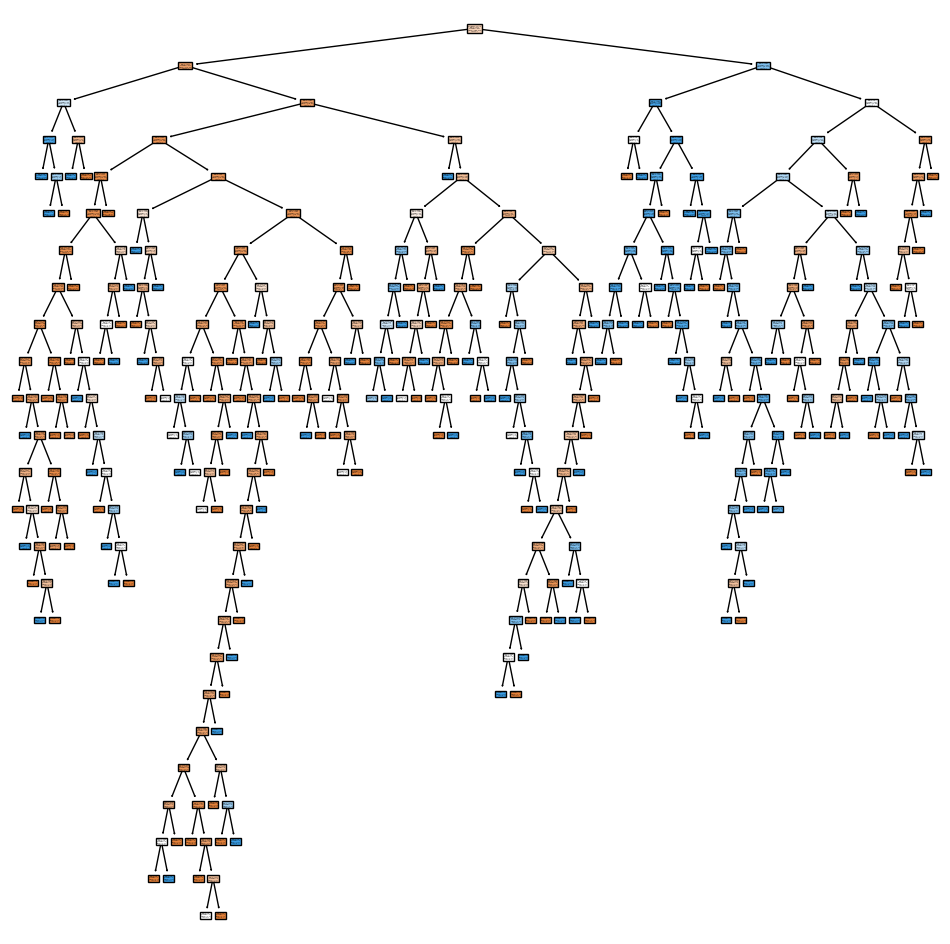

In [143]:
# Visualize the decision tree
import matplotlib.pyplot as plt
from sklearn import tree

class_names = [str(c) for c in y.unique()]

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decison_tree, filled=True, feature_names=X.columns, class_names=class_names, ax=ax)
plt.show()